# TASK1

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi

Реализуем класс SawtoothSignal. Он расширяет Signal и предоставляет возможность сделать оценку пилообразного сигнала.

In [10]:
class SawtoothSignal(thinkdsp.Sinusoid):    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

Результат создания пилообразоного сигнала:

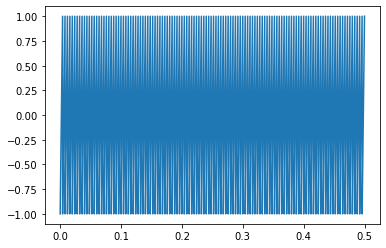

In [40]:
sawtooth = SawtoothSignal(250).make_wave(duration=0.5, framerate=40000)
sawtooth.plot()

Результат создания пилообразного звука:

In [41]:
sawtooth.make_audio()

Результат построения спекта:

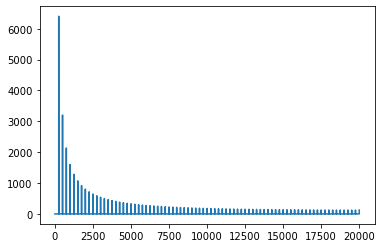

In [34]:
sawtooth.make_spectrum().plot()

Результат наложения:

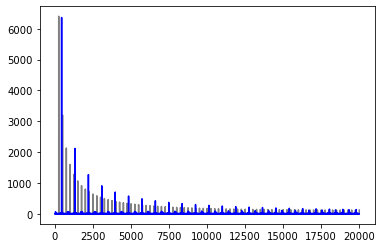

In [35]:
sawtooth.make_spectrum().plot(color='gray')
square = thinkdsp.SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot(color='blue')

Мы видим что спад пилообразных происходит аналогично спаду прямоугольных.
Так же стоит отметить, что пилообразный сигнал включает как четные, так и нечетные гармоники

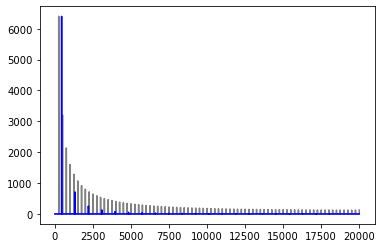

In [37]:
sawtooth.make_spectrum().plot(color='gray')
triangle = thinkdsp.TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot(color='blue')

В отличии от пилообразных гармоник, у треугольных спад протекает значительно быстрее.

# TASK2

Результат создания прямоугольной волны:

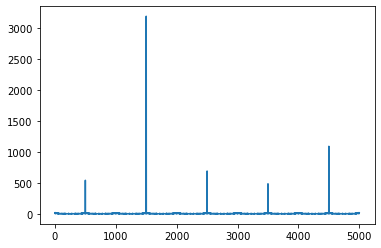

In [46]:
square = thinkdsp.SquareSignal(1500).make_wave(duration=0.5, framerate=10000)
square.make_spectrum().plot()

Вы можете видеть основную гармонику на частоте 1500 Гц и первую гармонику на частоте 4500 Гц, но вторая гармоника, которая должна быть на частоте 7500 Гц, смещается на 2500 Гц. Третья гармоника, которая должна быть на частоте 10500 Гц, будет наложена на -500 Гц, но она снова будет наложена на 500 Гц.

In [47]:
square.make_audio()

In [52]:
thinkdsp.SinSignal(500).make_wave(duration=0.5, framerate=10000).make_audio()

# TASK3

Результат создания треугольного сигнала:

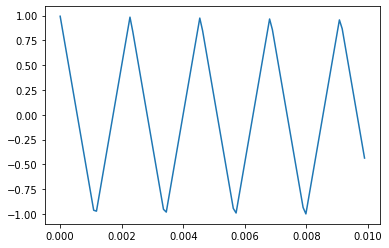

In [54]:
triangle = thinkdsp.TriangleSignal().make_wave(duration=0.01)
triangle.plot()

Первый элемент спектра - комплексное число, близкое к нулю.

In [55]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Если мы добавим компонент нулевой частоты, это приведет к вертикальному смещению волны.

Здесь мы можем наблюдать это смещение:

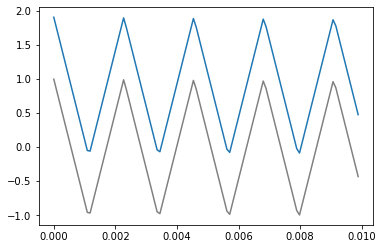

In [56]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

# TASK4

Реализуем метод:

In [105]:
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

Результат создания треугольного сигнала:

In [106]:
wave = thinkdsp.TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

Проделаем манипуляции со спектром при помощи нашей функции:

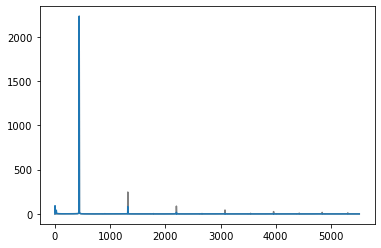

In [107]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)

Фильтр подавляет гармоники, поэтому он действует как фильтр нижних частот.

In [108]:
filtered = spectrum.make_wave()
filtered.make_audio()

Треугольная волна теперь звучит почти как синусоида.

# TASK5

Создание пилообразного сигнала:

In [95]:
freq = 500
signal = thinkdsp.SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=30000)
wave.make_audio()

Выведем спект:

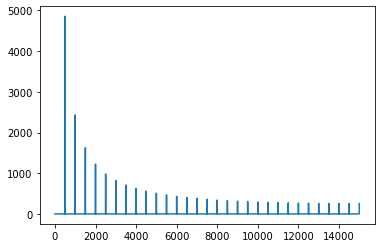

In [96]:
spectrum = wave.make_spectrum()
spectrum.plot()

При наложении видно, что спад происходит как 1/𝑓2 

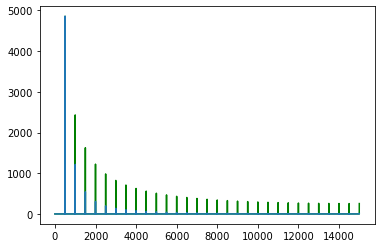

In [97]:
spectrum.plot(color='green')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

Прослушаем звук:

In [98]:
wave = spectrum.make_wave()
wave.make_audio()

И отобразим нашу волну

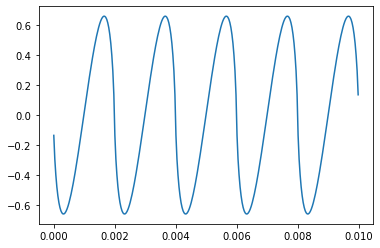

In [99]:
wave.segment(duration=0.01).plot()

In [ ]:
Наш сигнал стал схожим с синусоидой.